In [3]:
#To be able to read excel files
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 6.2 MB/s eta 0:00:00a 0:00:01


In [4]:
# All the imports needed

# Data Manipulation
import numpy as np
import pandas as pd 
import datetime

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading file directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/linkedin-jobs-data-in-saudi-arabia-2020/Linkedin Job Posts in Saudi Arabia 2020.xlsx


In [5]:
#Reading the file
jobs = pd.read_excel("/kaggle/input/linkedin-jobs-data-in-saudi-arabia-2020/Linkedin Job Posts in Saudi Arabia 2020.xlsx")

In [6]:
#Checking the head for the first 3 rows
jobs.head(3)

,linkedin_id,position_id,position,company,location,level,date,job_functions,industries,description
0,1632901070,51791,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,"['Marketing', 'Management']",['Banking'],NaN
1,1628497696,51792,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",Associate,2020-01-06,[''],['Government Administration'],Document Controller- (Saudi candidates only) ...
2,1666951758,51793,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",Auto req ID: 199735BRJob DescriptionPepsiCo Sa...


In [7]:
#Number of unique values
jobs.nunique()

linkedin_id      44889
position_id      48449
position         21141
company           6967
location           294
level                7
date               272
job_functions     2603
industries        3454
description      33005
dtype: int64

In [8]:
# Checking data types & null values
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48449 entries, 0 to 48448
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   linkedin_id    48443 non-null  object        
 1   position_id    48449 non-null  int64         
 2   position       48449 non-null  object        
 3   company        48447 non-null  object        
 4   location       48436 non-null  object        
 5   level          46758 non-null  object        
 6   date           48449 non-null  datetime64[ns]
 7   job_functions  48449 non-null  object        
 8   industries     48449 non-null  object        
 9   description    45252 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 3.7+ MB


<AxesSubplot:>

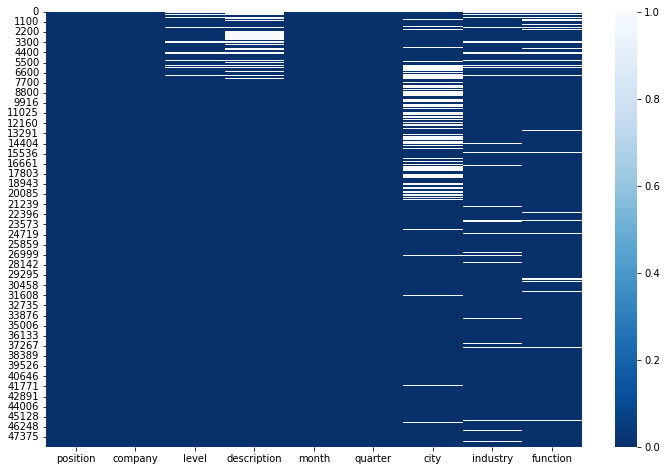

In [85]:
#Visualizing missing values
plt.figure(figsize=(12,8))
sns.heatmap(jobs.isnull(),cmap='Blues_r')

In [10]:
#Extracting month from the date given
jobs['month'] = pd.DatetimeIndex(jobs['date']).month

#Splitting months into quarters
jobs['quarter'] = pd.DatetimeIndex(jobs['date']).quarter

In [11]:
#Extracting city, industry and functions using regular expressions
for location in jobs:
    jobs['city'] = jobs['location'].str.extract('([A-Za-z]+)\,', expand=False)
    
for industries in jobs:
    jobs['industry'] = jobs['industries'].str.extract('([A-Za-z]+)\'', expand=False)

for function in jobs:
    jobs['function'] = jobs['job_functions'].str.extract('([A-Za-z]+)\']', expand=False)

In [91]:
#Assuming that null city values are remote jobs
jobs['city'].fillna(value='Remotely',inplace=True)

In [12]:
#Dropping duplicate values
jobs.drop_duplicates(inplace=True)

In [13]:
#Cleaning city values
jobs = jobs[(jobs['city'] != 'n') & (jobs['city'] != 'm') & (jobs['city'] !='f') & (jobs['city'] != 'Abdulaziz')
           &(jobs['city'] != 'k') & (jobs['city'] != 'if') & (jobs['city'] !='il') & (jobs['city'] != 'r')
           &(jobs['city'] != 'ir') & (jobs['city'] != 'in') & (jobs['city'] !='yya') & (jobs['city'] != 'an')]

In [14]:
#Dropping values after adding new columns
jobs.drop(['location','industries','date','linkedin_id','position_id','job_functions'],axis=1,inplace=True)

<AxesSubplot:xlabel='count', ylabel='quarter'>

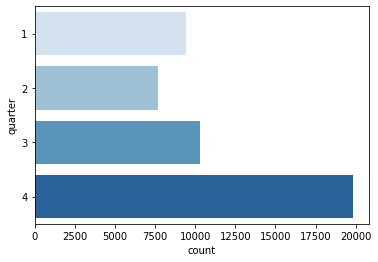

In [15]:
#Number of job posts by each quarter
sns.countplot(data=jobs,y='quarter',palette='Blues')

# City

<AxesSubplot:xlabel='count', ylabel='city'>

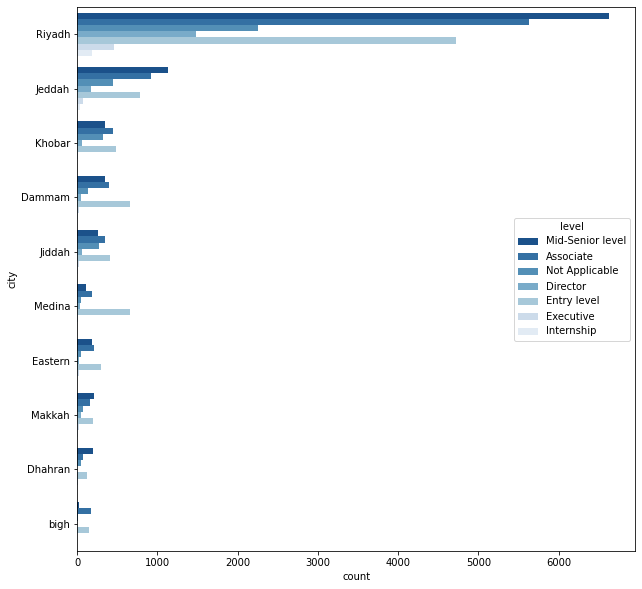

In [48]:
#Count of the most common jobs posting by city, splitting them based on the level of jobs
plt.figure(figsize=(10,10))
sns.countplot(y='city',hue='level',data=jobs,palette='Blues_r',order=jobs['city'].value_counts().nlargest(10).index)

## Job Industry

<AxesSubplot:xlabel='count', ylabel='industry'>

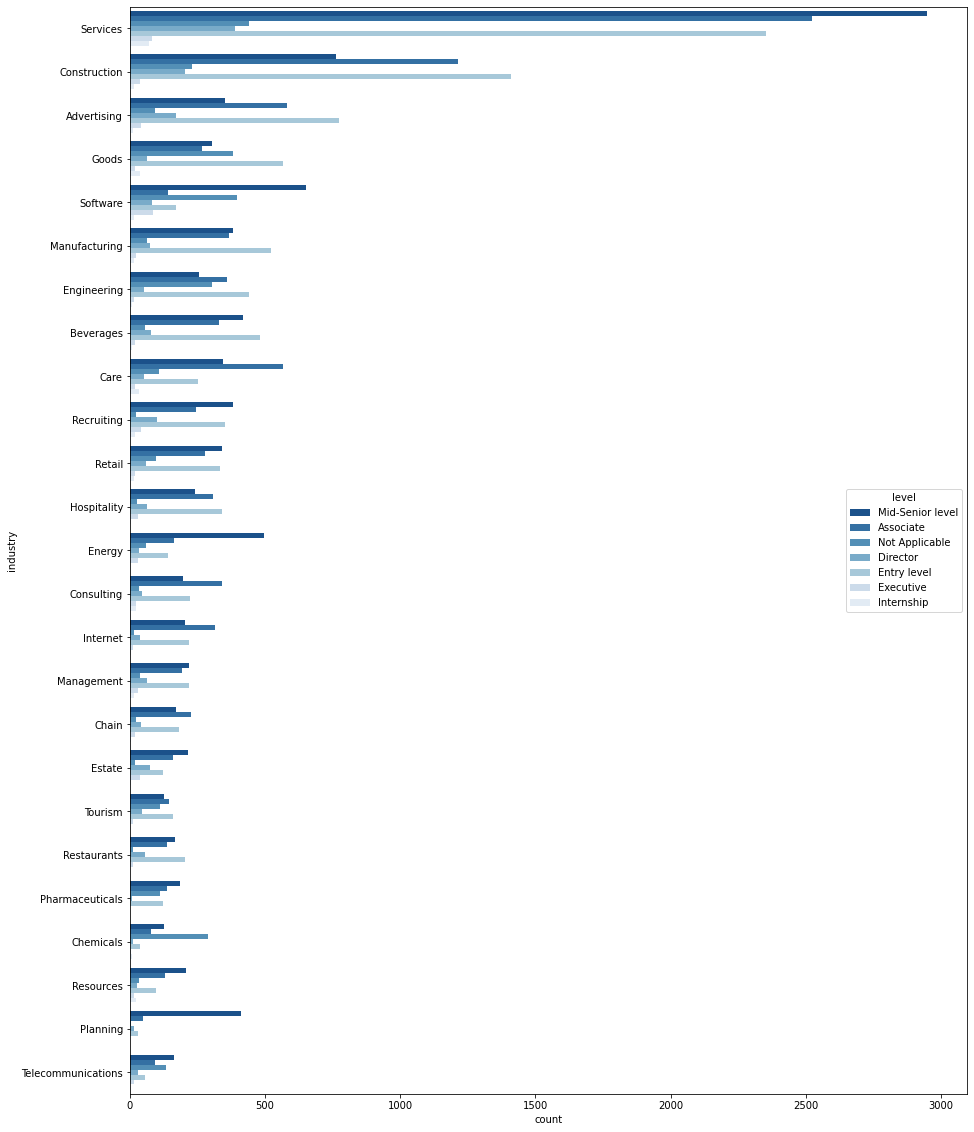

In [60]:
#Count of the most common job posting by industry, splitting them based on the level of jobs
plt.figure(figsize=(15,20))
sns.countplot(y='industry',hue='level',data=jobs,palette='Blues_r',order=jobs['industry'].value_counts().nlargest(25).index)

<AxesSubplot:xlabel='count', ylabel='industry'>

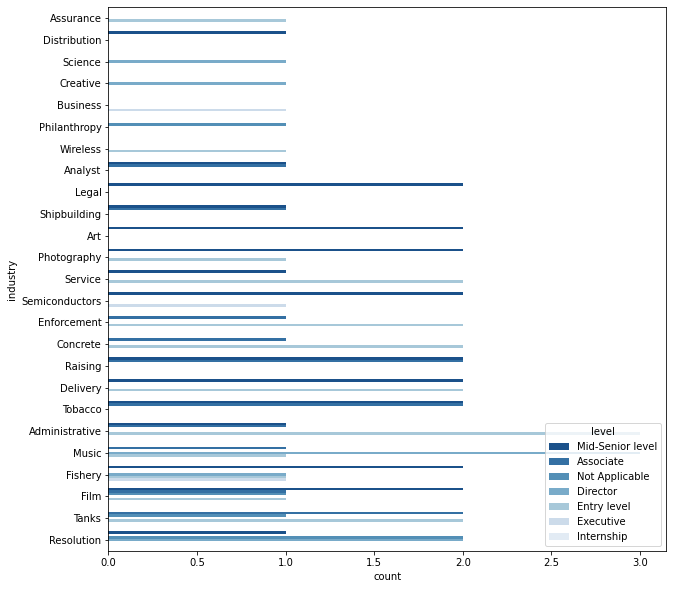

In [64]:
#Count of the least common job posting by industry, splitting them based on the level of jobs
plt.figure(figsize=(10,10))
sns.countplot(y='industry',hue='level',data=jobs,palette='Blues_r',order=jobs['industry'].value_counts().nsmallest(25).index)

## Job Function

<AxesSubplot:xlabel='count', ylabel='function'>

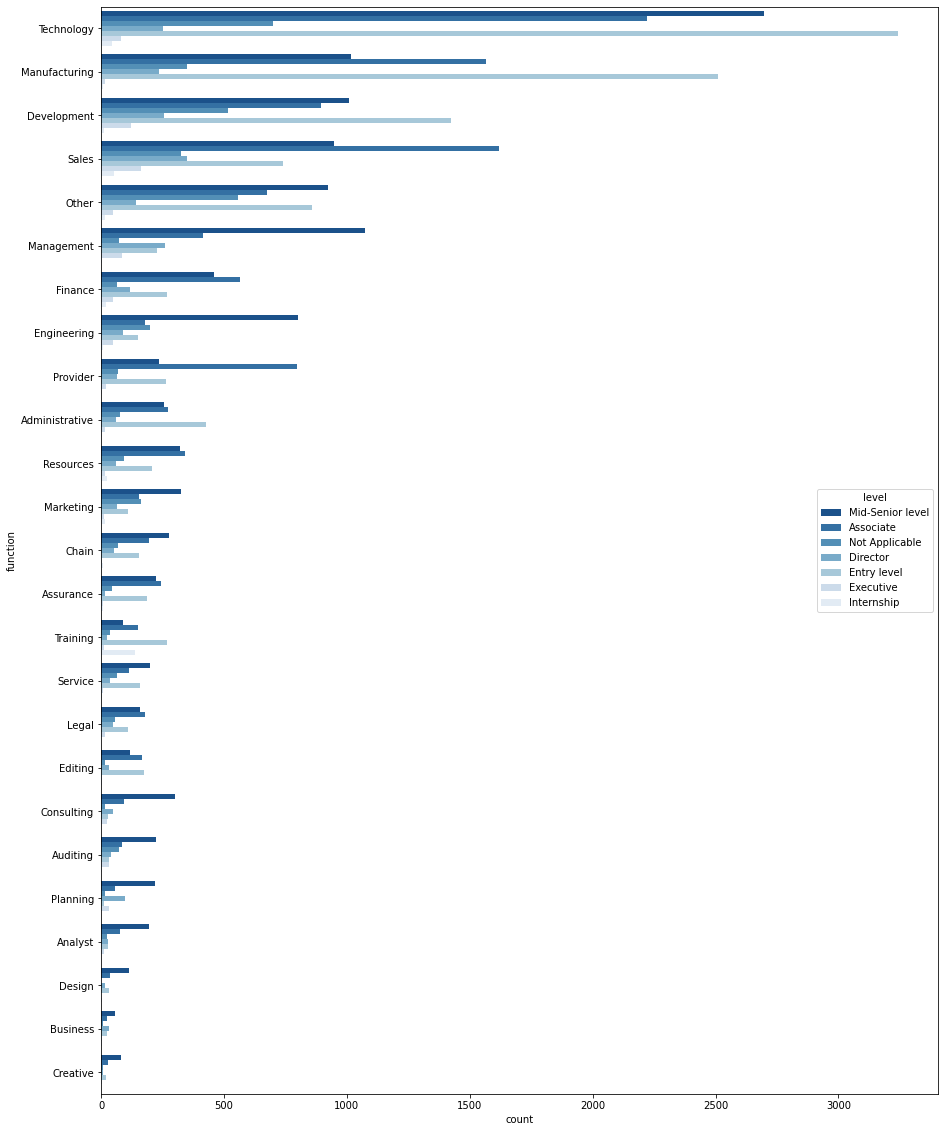

In [84]:
#Count of the most common job posting by function, splitting them based on the level of jobs
plt.figure(figsize=(15,20))
sns.countplot(y='function',hue='level',data=jobs,palette='Blues_r',order=jobs['function'].value_counts().nlargest(25).index)

<AxesSubplot:xlabel='count', ylabel='function'>

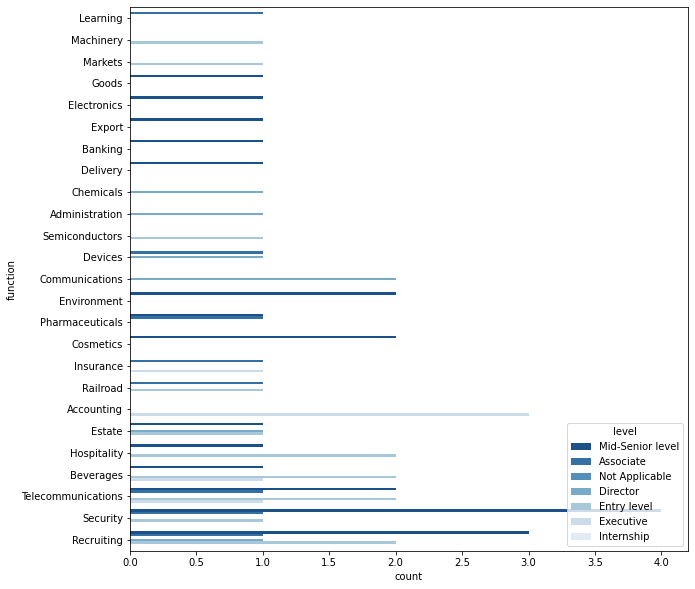

In [65]:
#Count of the least common job posting by function, splitting them based on the level of jobs
plt.figure(figsize=(10,10))
sns.countplot(y='function',hue='level',data=jobs,palette='Blues_r',order=jobs['function'].value_counts().nsmallest(25).index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='count'>

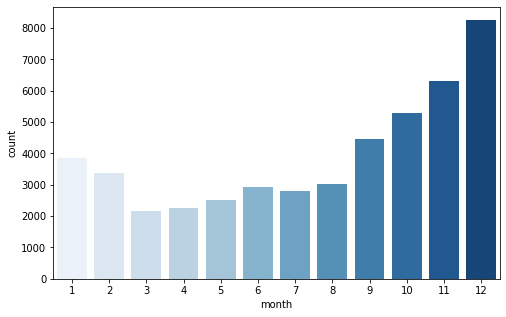

In [66]:
#Number of job posting by each month
plt.figure(figsize=(8,5))
sns.countplot(jobs['month'],palette='Blues')

<AxesSubplot:xlabel='month', ylabel='Density'>

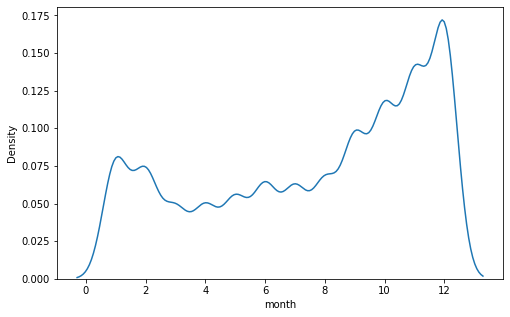

In [67]:
#Number of job posting by each month using kernel density estimate
plt.figure(figsize=(8,5))
sns.kdeplot(jobs['month'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='level', ylabel='count'>

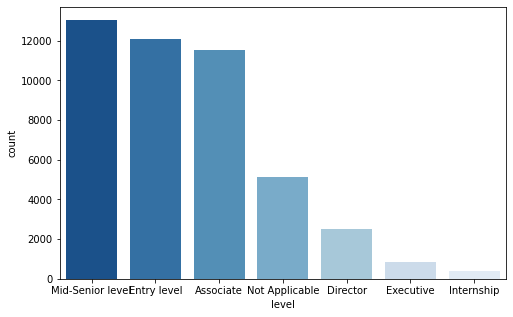

In [68]:
#Countplot for the job level count
plt.figure(figsize=(8,5))
sns.countplot(jobs['level'],palette='Blues_r',order= jobs['level'].value_counts().index)

In [23]:
#Top 100 companies and top 10 cities
top100companies = jobs['company'].value_counts().nlargest(100)
top10cities = jobs['city'].value_counts().nlargest(10)

In [24]:
#Top 100 companies with the most job posts
top100companies = pd.DataFrame(top100companies)
top100companies = top100companies.rename(columns={'index': 'Company_name','company': 'jobs_count'})
top100companies

,jobs_count
AFRY,1268
Landmark Arabia,1249
Confidential,882
Parsons Corporation,703
Crossover for Work,677
...,...
Shangri-La Group,65
SDAIA | سدايا,64
Radisson Hotel Group,63
KEO International Consultants,63


In [25]:
#Top 10 cities with the most job posts
top10cities = pd.DataFrame(top10cities)
top10cities.reset_index(inplace=True)
top10cities = top10cities.rename(columns={'index': 'City', 'cityb': 'jobs_count'})
top10cities

,City,city
0,Riyadh,22350
1,Jeddah,3653
2,Khobar,1716
3,Dammam,1647
4,Jiddah,1377
5,Medina,1062
6,Eastern,790
7,Makkah,732
8,Dhahran,486
9,bigh,352


In [26]:
#Top 3 companies with the most jobs posting by month
for i in jobs['month'].unique():
    print("Month",i)
    print(jobs[jobs['month'] == i]['company'].value_counts().head(3))
    print("----------------------------------")

Month 1
Landmark Arabia       315
Confidential          144
Crossover for Work    108
Name: company, dtype: int64
----------------------------------
Month 2
Landmark Arabia        439
Parsons Corporation     76
Aramco                  69
Name: company, dtype: int64
----------------------------------
Month 3
Landmark Arabia        71
Parsons Corporation    67
Bupa Arabia            53
Name: company, dtype: int64
----------------------------------
Month 4
Bupa Arabia           74
Amazon                70
Crossover for Work    66
Name: company, dtype: int64
----------------------------------
Month 5
Crossover for Work    72
AECOM                 54
Confidential          49
Name: company, dtype: int64
----------------------------------
Month 6
Crossover for Work    104
AECOM                  53
Confidential           50
Name: company, dtype: int64
----------------------------------
Month 7
Parsons Corporation    138
AECOM                   83
KATERRA                 74
Name: company, dtype

In [27]:
#Top 3 companies with the least jobs posting by month
for i in jobs['month'].unique():
    print("Month",i)
    print(jobs[jobs['month'] == i]['company'].value_counts().tail(3))
    print("----------------------------------")

Month 1
Nas Manpower company                  1
Nabors Drilling International ltd.    1
RAC Catering Services                 1
Name: company, dtype: int64
----------------------------------
Month 2
Waseela                                                   1
MACC Branch (Modern Architectural Contracting Company)    1
SHAHY Fast food restaurant chains                         1
Name: company, dtype: int64
----------------------------------
Month 3
Index Lights          1
OSN                   1
Al-Tamam United Co    1
Name: company, dtype: int64
----------------------------------
Month 4
Credit Suisse Securities ( India ) Pvt Ltd    1
Modest Solutions                              1
KAUST                                         1
Name: company, dtype: int64
----------------------------------
Month 5
International Islamic Trade Finance Corporation (ITFC)    1
Vestas                                                    1
M Abuouf Trading                                          1
Name: compan

## Thank you !, Feel free to add any comment or add on.